Starting from the “scr_deep_learning_keras.py” script:

Learning set:
X: (50000, 32, 32, 3)
y: (50000, 1)
Test set:
X: (10000, 32, 32, 3)
y: (10000, 1)
Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_79 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv

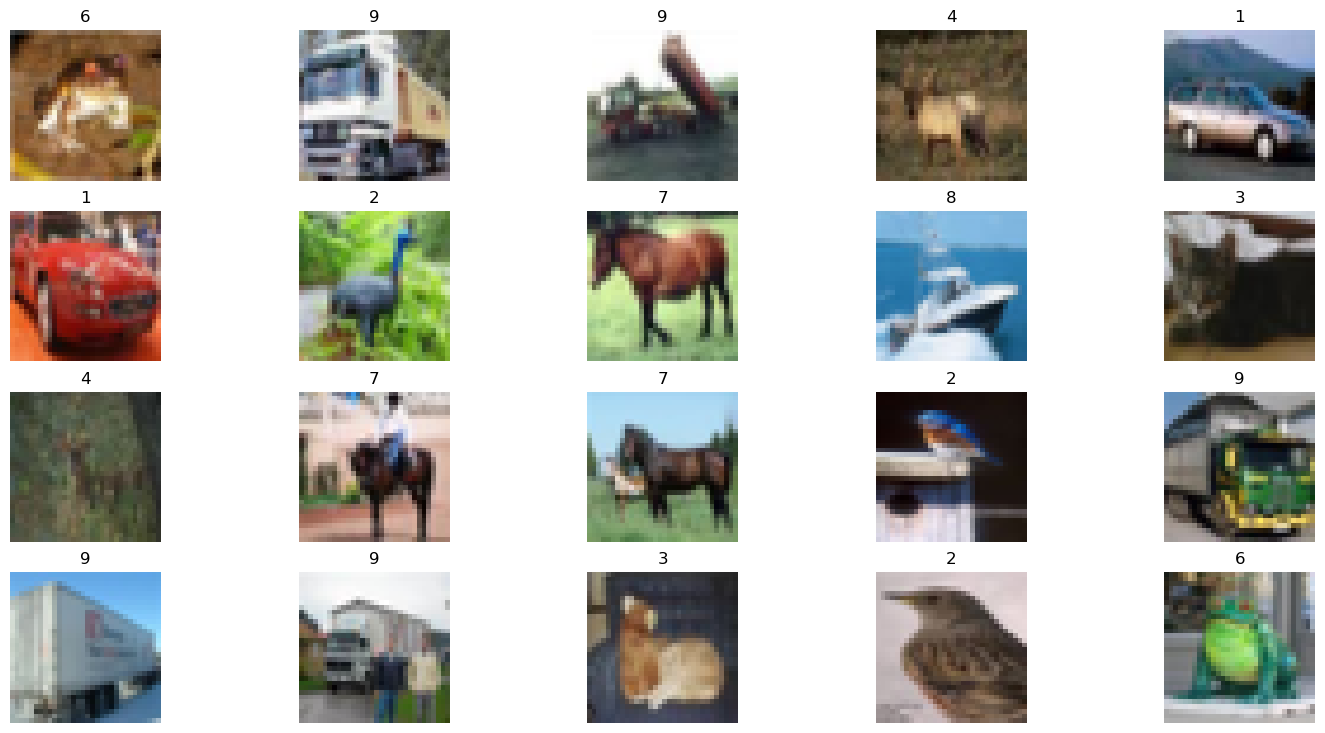

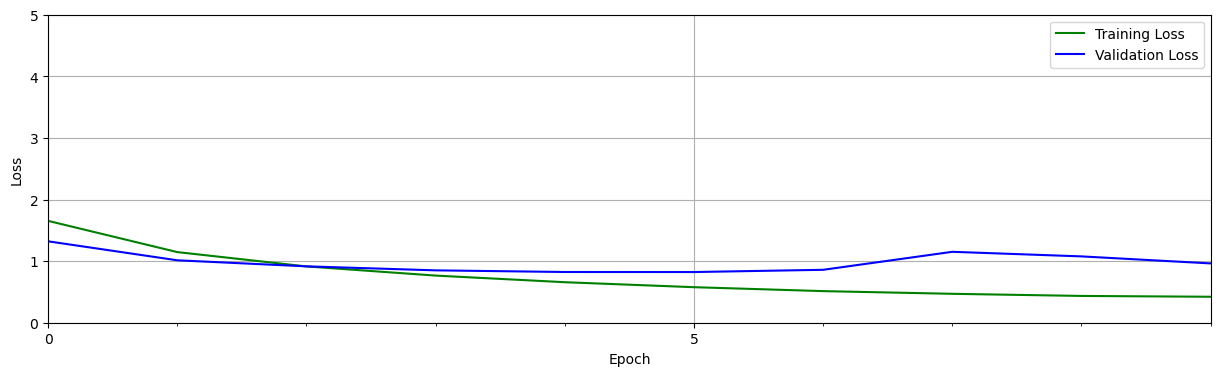

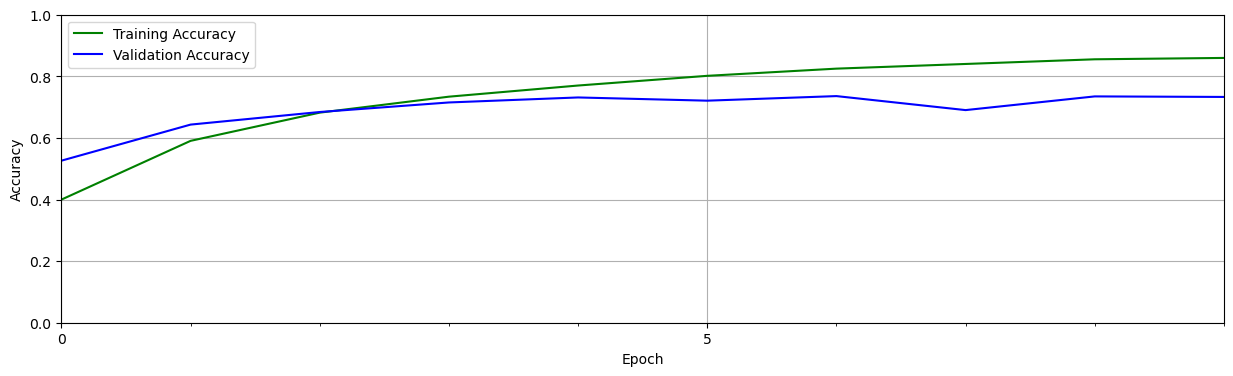

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

SEED_VALUE = 42

# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

# ##########################################################################
#	FX
# ##########################################################################

def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 9])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

# ##########################################################################

# Load the dataset (CIFAR-10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Learning set:')
print('X: ', end='')
print(X_train.shape)
print('y: ', end='')
print(y_train.shape)

print('Test set:')
print('X: ', end='')
print(X_test.shape)
print('y: ', end='')
print(y_test.shape)

# DEBUG. Plot some of the images
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 5

# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    ax.title.set_text(y_train[i,0])
    plt.axis("off")

# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

# Create the model.
model = cnn_model()
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=.3,
                   )

# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

 Adapt it to:
 1. Learn from large datasets, using the train_in_batch() function.

In [83]:
import os
import time
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

def cnn_model(input_shape=(224, 224, 3), output=Dense(2, activation='sigmoid')):
    model = Sequential()
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())    
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #------------------------------------
    # Flatten the convolutional)
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(output)
    return model


def process_image(file_path, target_size=(224, 224)):
    """ Load and preprocess an image """
    img = load_img(file_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

def extract_labels(filename):
    parts = filename.split('-')
    gender = 1 if parts[0].lower() == 'm' else 0  # Male: 1, Female: 0
    return gender 

def data_generator(file_paths, batch_size, label_extractor, num_classes=2):
    while True:
        batch_paths = np.random.choice(a=file_paths, size=batch_size)
        batch_input = []
        batch_output = []
        for file_path in batch_paths:
            image = process_image(file_path)
            label = label_extractor(os.path.basename(file_path))
            one_hot_label = to_categorical(label, num_classes=num_classes)
            batch_input.append(image)
            batch_output.append(one_hot_label)
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output).reshape(-1, num_classes)  # Reshape for compatibility
        yield batch_x, batch_y

def run_epochs(epochs, steps_per_epoch, train_generator, model, verbose=True):
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        start_time = time.time() 
        for _ in range(steps_per_epoch):
            x_batch, y_batch = next(train_generator)
            loss, accuracy = model.train_on_batch(x_batch, y_batch)
            epoch_loss += loss
            epoch_accuracy += accuracy
        # Average the loss and accuracy for this epoch
        epoch_loss /= steps_per_epoch
        epoch_accuracy /= steps_per_epoch
        epoch_duration = time.time() - start_time  # Calculate the duration of the epoch
        if verbose:
            print(f'Epoch {epoch + 1}/{epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, Time: {epoch_duration:.2f} seconds')
    return epoch_loss, epoch_accuracy


image_directory = 'C:\\Users\\lucas.rocha\\Downloads\\AR_out'
file_paths = [os.path.join(image_directory, filename) for filename in os.listdir(image_directory)]
batch_size = 32
train_generator = data_generator(file_paths, batch_size, extract_labels)
steps_per_epoch = int(len(file_paths) / batch_size)
num_epochs = 3

model = cnn_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

_ = run_epochs(num_epochs, steps_per_epoch, train_generator, model)

Epoch 1/3 - Loss: 1.8577, Accuracy: 0.8762, Time: 101.06 seconds
Epoch 2/3 - Loss: 0.1287, Accuracy: 0.9572, Time: 97.62 seconds
Epoch 3/3 - Loss: 0.0394, Accuracy: 0.9860, Time: 97.20 seconds


2. Use different network architectures, either created by you or well-known structures (e.g., VGG, ResNet, Inception or others)

In [85]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

def load_and_train(model_class, verbose=True, train_generator=train_generator, output_layer=Dense(2, activation='sigmoid'), fine_tuning=True):
    base_model = model_class(input_tensor=Input(shape=(224, 224, 3)))
    if fine_tuning:
        # Loading pre-trained model on ImageNet
        base_model = model_class(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    output = output_layer(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    if fine_tuning:
        # Freezing pre-trained layers
        for layer in base_model.layers:
            layer.trainable = False
    return run_epochs(num_epochs, steps_per_epoch, train_generator, model, verbose)


third_party_models = [VGG16, ResNet50]
for third_party_model in third_party_models:
    print(f'{third_party_model.__name__} Model:')
    load_and_train(third_party_model)

VGG16 Model:
Epoch 1/3 - Loss: 0.9137, Accuracy: 0.5231, Time: 428.46 seconds
Epoch 2/3 - Loss: 0.6856, Accuracy: 0.5525, Time: 420.42 seconds
Epoch 3/3 - Loss: 0.7034, Accuracy: 0.5540, Time: 421.51 seconds
ResNet50 Model:
Epoch 1/3 - Loss: 1.3948, Accuracy: 0.9357, Time: 252.36 seconds
Epoch 2/3 - Loss: 0.0440, Accuracy: 0.9851, Time: 240.48 seconds
Epoch 3/3 - Loss: 0.0831, Accuracy: 0.9748, Time: 240.96 seconds


3. Divide the available datasets into learn/validation and test subsets, in order to create models that predict:
    a. ID;
    b. Facial expression;
    c. Gender;
    d. Glasses.

In [86]:
def extract_feature(filename):
    feature = int(filename.split('-')[2].split('.')[0])
    if feature > 13:
        feature -= 13 # 14 to 26: regard second session (same conditions as 1 to 13)
    return feature

def extract_id_label(filename):
    return int(filename.split('-')[1])

def extract_expression_label(filename):
    feature = extract_feature(filename)
    if feature > 4:
        feature = 5 # above 4, everything is a non-expression 
    return feature - 1 # should start on 0

def extract_gender_label(filename):
    return 1 if filename.startswith('m-') else 0

def extract_glasses_label(filename):
    glasses_feature_numbers = [8, 9, 10]
    feature = extract_feature(filename)
    return 1 if feature in glasses_feature_numbers else 0

def data_generator(file_paths, batch_size, label_extractor, num_classes=2):
    while True:
        batch_paths = np.random.choice(a=file_paths, size=batch_size)
        batch_input = []
        batch_output = []
        for file_path in batch_paths:
            image = process_image(file_path)
            label = label_extractor(os.path.basename(file_path))
            one_hot_label = to_categorical(label, num_classes=num_classes)
            batch_input.append(image)
            batch_output.append(one_hot_label)
        batch_x = np.array(batch_input)
        batch_y = np.array(batch_output).reshape(-1, num_classes)  # Reshape for compatibility
        yield batch_x, batch_y

trainers = [
    ['ID', data_generator(file_paths, batch_size, extract_id_label, 138), Dense(138, activation='softmax')],
    ['Expression', data_generator(file_paths, batch_size, extract_expression_label, 5), Dense(5, activation='softmax')],
    ['Gender', data_generator(file_paths, batch_size, extract_gender_label), Dense(2, activation='sigmoid')],
    ['Glasses', data_generator(file_paths, batch_size, extract_glasses_label), Dense(2, activation='sigmoid')],
]

for feature_name, train_generator, output_layer in trainers:
    print(f'\nPredicting {feature_name}:')
    model = cnn_model(output=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time() 
    loss, accuracy = run_epochs(num_epochs, steps_per_epoch, train_generator, model, False)
    duration = time.time() - start_time 
    print(f'My Model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Time: {duration:.2f} seconds')
    for third_party_model in third_party_models:
        start_time = time.time()
        loss, accuracy = load_and_train(third_party_model, False, train_generator, output_layer)
        duration = time.time() - start_time 
        print(f'{third_party_model.__name__} Model - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Time: {duration:.2f} seconds')
        
    


Predicting ID:
My Model - Loss: 1.7360, Accuracy: 0.5373, Time: 288.41 seconds
VGG16 Model - Loss: 0.0389, Accuracy: 0.0206, Time: 1239.84 seconds
ResNet50 Model - Loss: 0.0029, Accuracy: 0.9669, Time: 713.53 seconds

Predicting Expression:
My Model - Loss: 0.4826, Accuracy: 0.7931, Time: 287.64 seconds
VGG16 Model - Loss: 0.2498, Accuracy: 0.7027, Time: 1243.95 seconds
ResNet50 Model - Loss: 0.0518, Accuracy: 0.9451, Time: 722.79 seconds

Predicting Gender:
My Model - Loss: 0.0187, Accuracy: 0.9942, Time: 288.25 seconds
VGG16 Model - Loss: 0.2994, Accuracy: 0.8808, Time: 1232.85 seconds
ResNet50 Model - Loss: 0.0590, Accuracy: 0.9830, Time: 32745.73 seconds

Predicting Glasses:
My Model - Loss: 0.0009, Accuracy: 0.9997, Time: 316.85 seconds
VGG16 Model - Loss: 0.6053, Accuracy: 0.7715, Time: 1301.89 seconds
ResNet50 Model - Loss: 0.0064, Accuracy: 0.9991, Time: 726.93 seconds


4. Compare the effectiveness attained by each architecture in each task, when using the “learning from scratch” and “fine tuning” paradigms.

In [87]:
for feature_name, train_generator, output_layer in trainers:
    print(f'\nPredicting {feature_name}:')
    for third_party_model in third_party_models:
        for i, config in enumerate(['from scratch', 'fine tuning']):
            start_time = time.time()
            loss, accuracy = load_and_train(third_party_model, False, train_generator, output_layer, bool(i))
            duration = time.time() - start_time 
            print(f'{third_party_model.__name__} Model ({config}) - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, Time: {duration:.2f} seconds')


Predicting ID:
VGG16 Model (from scratch) - Loss: 0.0394, Accuracy: 0.0155, Time: 1547.62 seconds
VGG16 Model (fine tuning) - Loss: 0.0339, Accuracy: 0.1259, Time: 1366.75 seconds
ResNet50 Model (from scratch) - Loss: 0.0386, Accuracy: 0.0218, Time: 760.58 seconds
ResNet50 Model (fine tuning) - Loss: 0.0123, Accuracy: 0.8013, Time: 973.87 seconds

Predicting Expression:
VGG16 Model (from scratch) - Loss: 0.3373, Accuracy: 0.6975, Time: 1520.28 seconds
VGG16 Model (fine tuning) - Loss: 0.2271, Accuracy: 0.6893, Time: 1344.19 seconds
ResNet50 Model (from scratch) - Loss: 0.1643, Accuracy: 0.7618, Time: 844.77 seconds
ResNet50 Model (fine tuning) - Loss: 0.0538, Accuracy: 0.9399, Time: 903.96 seconds

Predicting Gender:
VGG16 Model (from scratch) - Loss: 0.6882, Accuracy: 0.5534, Time: 1536.72 seconds
VGG16 Model (fine tuning) - Loss: 0.6893, Accuracy: 0.5449, Time: 1284.25 seconds
ResNet50 Model (from scratch) - Loss: 0.1602, Accuracy: 0.9487, Time: 688.94 seconds
ResNet50 Model (fine t